In [5]:
data, full = 'LAD', 'LAD2000'
venv = f'C:\\Users\\cps1\\violence_project\\venv\\Violence'
# path = f'{venv}\\Final_Detection\\{data}_Data\\Classification'
path = f'{venv}\\..\\classification\\{data}'

In [6]:
import os
import sys
import cv2
import zipfile
import numpy as np
import imageio
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import svm
from sklearn.model_selection import train_test_split
# from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths
from tensorflow.keras import layers, models

In [7]:
x_train = np.load(f'{path}\\{data}_x_train_4000.npy')[:5000]
y_train = [1 for i in range(len(x_train))]
# y_train = np.load(f'{path}\\XD_y_train_4000.npy')
# x_test = np.load(f'{path}\\x_test.npy')
# y_test = np.load(f'{path}\\y_test.npy')
# x_val = np.load(f'{path}\\x_val.npy')
# y_val = np.load(f'{path}\\y_val.npy')

In [8]:
x_train_2 = np.load(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\nv_{data}_x.npy')
y_train_2 = np.load(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\nv_{data}_y.npy')

In [9]:
x_train = np.concatenate((x_train,x_train_2))
y_train = np.concatenate((np.array(y_train),np.array(y_train_2)))
x_train = np.moveaxis(x_train, 1, 3)

In [10]:
x_train, x_rem, y_train, y_rem = train_test_split(x_train, y_train,  train_size=0.7,shuffle = True, random_state=7)

In [11]:
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5, shuffle = True,  random_state=7)

In [12]:
x_train.shape

(5734, 75, 75, 15, 3)

In [13]:
# x_train = np.moveaxis(x_train, 1, 3)
# x_test = np.moveaxis(x_test, 1, 3)
# x_val = np.moveaxis(x_val, 1, 3)

In [14]:
x_train.shape, x_test.shape, x_valid.shape

((5734, 75, 75, 15, 3), (1229, 75, 75, 15, 3), (1229, 75, 75, 15, 3))

In [15]:
dim = x_train.shape[1:]
dim

(75, 75, 15, 3)

In [16]:
model = models.Sequential()
# model.add(layers.BatchNormalization())
model.add(layers.Conv3D(32, kernel_size=(3, 3, 1), activation='relu', kernel_initializer='he_uniform', data_format='channels_last', input_shape=dim))
model.add(layers.MaxPooling3D((2, 2, 1)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv3D(32, kernel_size=(3, 3, 2), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling3D((3, 3, 1)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv3D(32, kernel_size=(3, 3, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling3D((2, 2, 1)))
# model.add(layers.BatchNormalization())
model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
# def get_model(width=128, height=128, depth=64):
#     """Build a 3D convolutional neural network model."""

#     inputs = keras.Input((width, height, depth, 3))

#     x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
#     x = layers.MaxPool3D(pool_size=1)(x)
#     x = layers.BatchNormalization()(x)

#     x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
#     x = layers.MaxPool3D(pool_size=1)(x)
#     x = layers.BatchNormalization()(x)

#     x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
#     x = layers.MaxPool3D(pool_size=2)(x)
#     x = layers.BatchNormalization()(x)

#     x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
#     x = layers.MaxPool3D(pool_size=2)(x)
#     x = layers.BatchNormalization()(x)

#     x = layers.GlobalAveragePooling3D()(x)
#     x = layers.Dense(units=512, activation="relu")(x)
#     x = layers.Dropout(0.3)(x)

#     outputs = layers.Dense(units=1, activation="sigmoid")(x)

#     # Define the model.
#     model = keras.Model(inputs, outputs, name="3dcnn")
#     return model


# # Build model.
# model = get_model(dim[0],dim[1],dim[2])
# model.summary()

In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00025),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_valid, y_valid),
                    shuffle=True)

Epoch 1/10
180/180 [==============================] - 3226s 18s/step - loss: 0.4844 - accuracy: 0.7761 - val_loss: 0.2124 - val_accuracy: 0.9317
Epoch 2/10
180/180 [==============================] - 2362s 13s/step - loss: 0.1757 - accuracy: 0.9369 - val_loss: 0.3183 - val_accuracy: 0.8861
Epoch 3/10
180/180 [==============================] - 2379s 13s/step - loss: 0.1142 - accuracy: 0.9594 - val_loss: 0.1326 - val_accuracy: 0.9593
Epoch 4/10
180/180 [==============================] - 2371s 13s/step - loss: 0.0709 - accuracy: 0.9758 - val_loss: 0.0603 - val_accuracy: 0.9854
Epoch 5/10
180/180 [==============================] - 2373s 13s/step - loss: 0.0507 - accuracy: 0.9817 - val_loss: 0.0465 - val_accuracy: 0.9878
Epoch 6/10
180/180 [==============================] - 2370s 13s/step - loss: 0.0251 - accuracy: 0.9930 - val_loss: 0.0590 - val_accuracy: 0.9886
Epoch 7/10
180/180 [==============================] - 2376s 13s/step - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0698 - val_ac

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 73, 73, 15, 32)    896       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 36, 36, 15, 32)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 34, 34, 14, 32)    18464     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 11, 11, 14, 32)   0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 9, 9, 14, 32)      9248      
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 4, 4, 14, 32)     0

In [21]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_loss, test_acc

39/39 - 23s - loss: 0.0163 - accuracy: 0.9951 - 23s/epoch - 591ms/step


(0.01629670336842537, 0.9951179623603821)

(0.0, 0.5081212993711233)

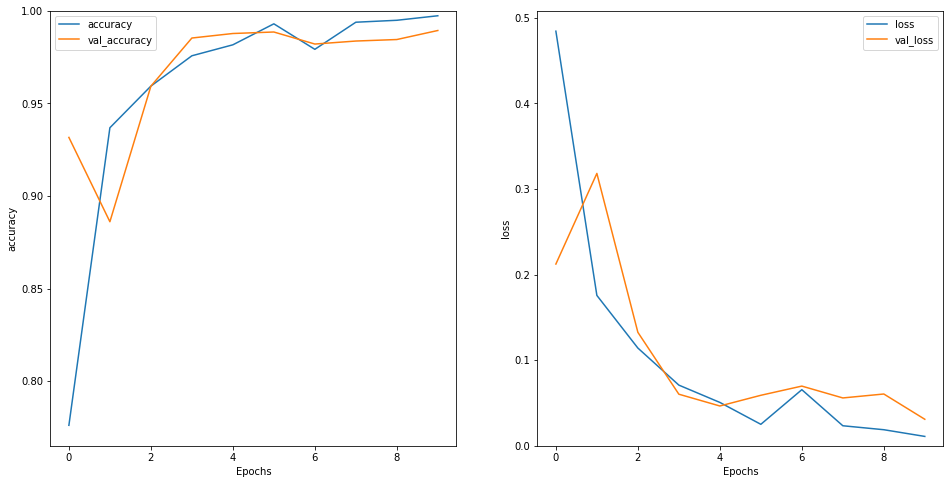

In [24]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)

plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
# plt.savefig(f'{os.getcwd()}\\models\\ucf\\acc_loss_99.73.png')


In [22]:
model.save(f"{venv}\\Final_Detection\\Models\\{data}_Model")

INFO:tensorflow:Assets written to: C:\Users\cps1\violence_project\venv\Violence\Final_Detection\Models\LAD_Model\assets
